In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'
from matplotlib.markers import MarkerStyle

In [35]:
train_loss = []
valid_loss = []
with open('model\\train_log.txt', 'r') as f:
    for line in f:
        l = line.strip()
        sl = l.split(' ')
        if len(sl) > 4 and sl[-4] == 'train' and sl[-3] == 'loss':
            # print(l)
            train_loss.append(float(sl[-1]))
            # break
        elif len(sl) > 4 and sl[-4] == 'valid' and sl[-3] == 'loss':
            valid_loss.append(float(sl[-1]))
f.close()
len(train_loss), len(valid_loss)

(100, 100)

In [36]:
train_loss = [train_loss[2*i] for i in range(int(len(train_loss)/2))]
valid_loss = [valid_loss[2*i] for i in range(int(len(valid_loss)/2))]
len(train_loss), len(valid_loss)

(50, 50)

In [37]:
train_loss = train_loss[:25]
valid_loss = valid_loss[:25]
len(train_loss), len(valid_loss)

(25, 25)

In [38]:
df = pd.DataFrame({'epoch': [i + 1 for i in range(len(train_loss))], '训练损失': train_loss, '验证损失': valid_loss})

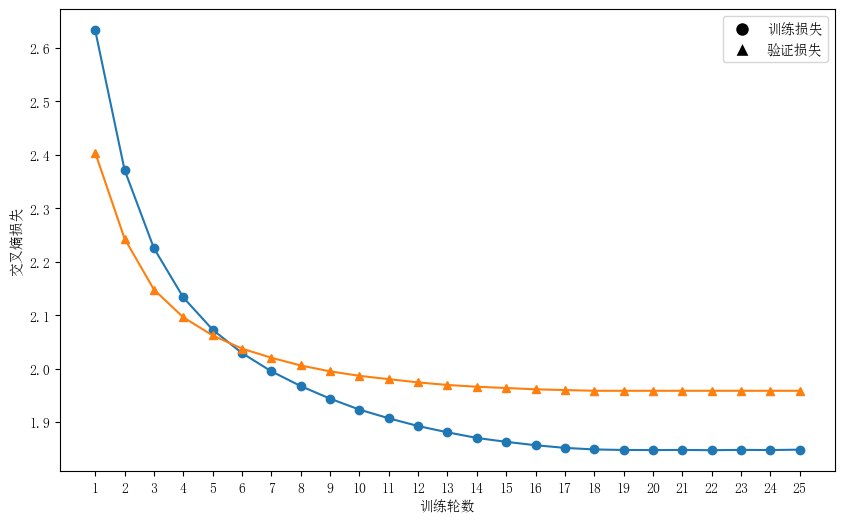

In [40]:
ax = df.set_index('epoch')[['训练损失', '验证损失']].plot(figsize=(10,6))
ax.set_ylabel('交叉熵损失')
ax.set_xlabel('训练轮数')
ax.set_xticks([i + 1 for i in range(25)])

markers = ['o', '^'] # 分别代表圆形，三角形，菱形和正方形
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i]) # 为每个数据系列设置标记形状

from matplotlib.lines import Line2D
# 添加注记
legend_elements = [Line2D([0], [0], marker='o', color='w', label='训练损失', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='验证损失', markerfacecolor='black', markersize=10),]
ax.legend(handles=legend_elements, loc='upper right')

In [77]:

import pandas as pd

# Load tensorboard data
logdir = "C:\\Users\\ArrowOoops\\Downloads\\csv.csv"

info = pd.read_csv(logdir)
df = pd.DataFrame({'step': [i + 1 for i in range(len(info))], 
                   '原始交叉熵损失': info['Value'], 
                   'Step': info['Step']})
df

,step,原始交叉熵损失,Step
0,1,2.637497,167
1,2,2.565016,474
2,3,2.539086,536
3,4,2.374250,586
4,5,2.930698,647
...,...,...,...
995,996,2.134733,448997
996,997,0.841981,449221
997,998,1.542603,449308
998,999,1.654399,449431


In [74]:
445/30

14.833333333333334

In [76]:
for i in range(0, 445001, 25000):
    print(i)

0
25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000
350000
375000
400000
425000


In [78]:
window_size = 30
df['交叉熵损失'] = df['原始交叉熵损失'].rolling(window_size, min_periods=1).mean()

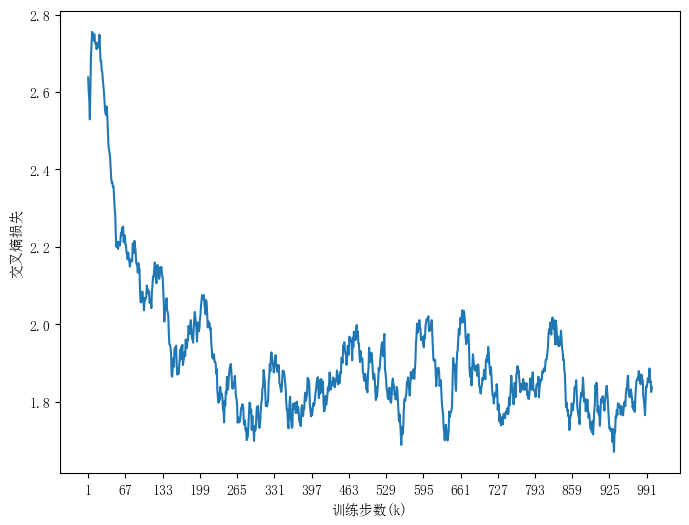

In [84]:
ax = df.set_index('step')['交叉熵损失'].plot(figsize=(8,6))
ax.set_ylabel('交叉熵损失')
ax.set_xlabel('训练步数(k)')
x_ticks = df['step'].iloc[::len(df)//15].tolist()
ax.set_xticks(x_ticks)